# Mode-1

 Training is with November data  
 Testing is on November data 

# load necessary libraries 

In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout, BatchNormalization
from keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import collections
import csv
import numpy
import pandas as pd
import efficientnet.keras as efn
from collections import Counter
from keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
warnings.simplefilter(action='ignore', category = FutureWarning)
%matplotlib inline

In [2]:
# train_path= 'train'
# valid_path = 'valid'
# test_path = 'test'
# train_batches = ImageDataGenerator(rescale = 1.0/255.,zoom_range=0.2).flow_from_directory(directory=train_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10)
# test_batches = ImageDataGenerator(rescale = 1.0/255.).flow_from_directory(directory=test_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10,shuffle=False)
# valid_batches = ImageDataGenerator(rescale = 1.0/255.).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10)
# imgs, labels = next(train_batches)

# Load test data
test_path = 'test'
test_batches = ImageDataGenerator(rescale = 1.0/255.).flow_from_directory(directory=test_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10,shuffle=False)
imgs, labels = next(test_batches)


Found 833 images belonging to 4 classes.


# Helper functions

In [3]:
# PLOT CONFUSION MATRIX
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
# PLOT IMAGES 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr , axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

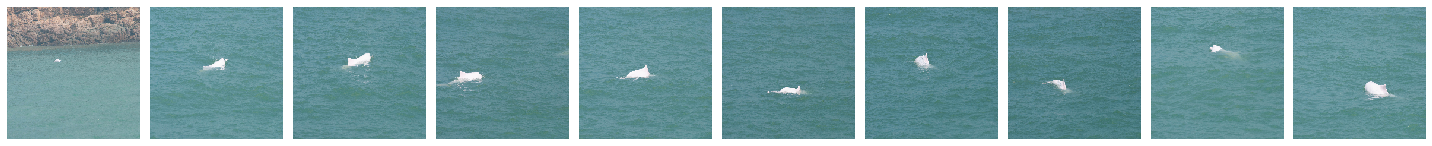

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [5]:
# check if data is loaded 
plotImages(imgs)
print(labels)

# load trained models

## load model-1

In [6]:
model_1 = keras.models.load_model('results/efficientnetb7_v2_finetune_one_unused_augmented_regularisation.h5')
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b7 (Functional) (None, 7, 7, 2560)        64097680  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2560)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2560)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               768300    
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

# confusion matrix

Confusion matrix, without normalization
[[386   1  34  36]
 [  9  41  38   1]
 [ 20  24 194   1]
 [  0   0   0  48]]


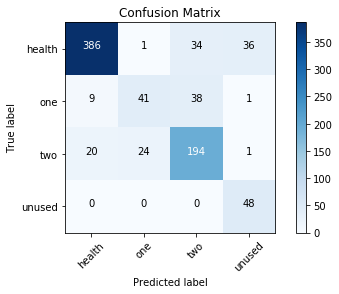

In [7]:
predictions = model_1.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [8]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_1.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))

0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.93      0.84      0.89       457
           1       0.62      0.46      0.53        89
           2       0.73      0.81      0.77       239
           3       0.56      1.00      0.72        48

    accuracy                           0.80       833
   macro avg       0.71      0.78      0.72       833
weighted avg       0.82      0.80      0.80       833



# Model-2 

Training on november data 
Testing on April data 

In [9]:
model_2 = keras.models.load_model('results/efficientnetb7_v2_finetune_April_added_finetune.h5')
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b7 (Functional) (None, 7, 7, 2560)        64097680  
_________________________________________________________________
global_max_pooling2d (Global (None, 2560)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               768300    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3

# Confusion matrix 


Confusion matrix, without normalization
[[324   4 124   5]
 [  3  56  30   0]
 [ 36  73 130   0]
 [  2   0   0  46]]


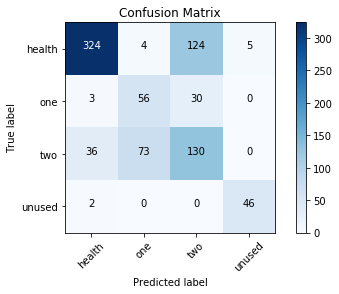

In [10]:
predictions = model_2.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [11]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_2.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))

0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       457
           1       0.42      0.63      0.50        89
           2       0.46      0.54      0.50       239
           3       0.90      0.96      0.93        48

    accuracy                           0.67       833
   macro avg       0.67      0.71      0.68       833
weighted avg       0.72      0.67      0.68       833



# Load April data and test 

In [16]:
# Load test data
test_path = 'test'
test_batches = ImageDataGenerator(rescale = 1.0/255.).flow_from_directory(directory=test_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10,shuffle=False)
imgs, labels = next(test_batches)

Found 1216 images belonging to 4 classes.


# Test on November model 

Confusion matrix, without normalization
[[125   9  64 149]
 [ 46  19  24   0]
 [291 171 178  34]
 [  0   0   9  97]]


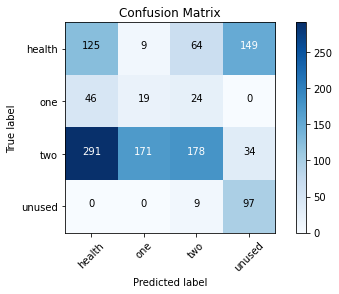

In [17]:
predictions = model_1.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [18]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_1.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))


0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.27      0.36      0.31       347
           1       0.10      0.21      0.13        89
           2       0.65      0.26      0.38       674
           3       0.35      0.92      0.50       106

    accuracy                           0.34      1216
   macro avg       0.34      0.44      0.33      1216
weighted avg       0.47      0.34      0.35      1216



# Test on Aril+November Model 

Confusion matrix, without normalization
[[170   7  98  72]
 [  1  45  43   0]
 [ 73 175 425   1]
 [ 13   0   5  88]]


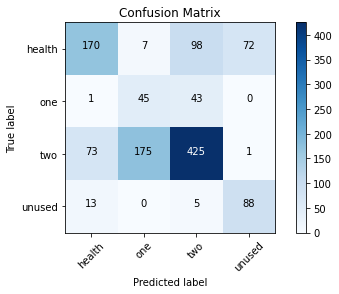

In [20]:
predictions = model_2.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [21]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_2.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))

0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.66      0.49      0.56       347
           1       0.20      0.51      0.28        89
           2       0.74      0.63      0.68       674
           3       0.55      0.83      0.66       106

    accuracy                           0.60      1216
   macro avg       0.54      0.61      0.55      1216
weighted avg       0.66      0.60      0.62      1216



# Added new data in one for Training 


In [15]:
model_one = keras.models.load_model('results/efficientnetb7_v2_finetune_oneMax.h5')
model_one.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b7 (Functional) (None, 7, 7, 2560)        64097680  
_________________________________________________________________
global_max_pooling2d (Global (None, 2560)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               768300    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3

Confusion matrix, without normalization
[[273  94  72  18]
 [  1  69  19   0]
 [  7  90 142   0]
 [  0   0   0  48]]


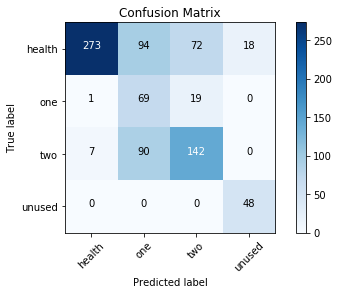

In [16]:
predictions = model_one.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [17]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_one.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))

0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.97      0.60      0.74       457
           1       0.27      0.78      0.40        89
           2       0.61      0.59      0.60       239
           3       0.73      1.00      0.84        48

    accuracy                           0.64       833
   macro avg       0.65      0.74      0.65       833
weighted avg       0.78      0.64      0.67       833



# TESTING 2 WITH ONE ULTRA DATA 

In [18]:
model_one_ultra = keras.models.load_model('results/efficientnetb7_v2_finetune_one_four_trips.h5')
model_one_ultra.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b7 (Functional) (None, 7, 7, 2560)        64097680  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2560)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2560)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               768300    
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

Confusion matrix, without normalization
[[174 268  10   5]
 [  0  89   0   0]
 [  2 224  13   0]
 [  0   0   0  48]]


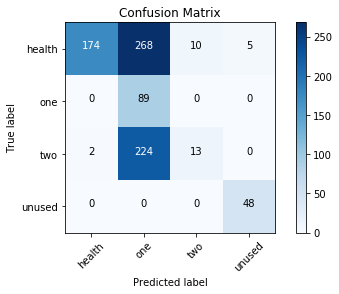

In [19]:
predictions = model_one_ultra.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [23]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_one_ultra.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))

0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.99      0.38      0.55       457
           1       0.15      1.00      0.27        89
           2       0.57      0.05      0.10       239
           3       0.91      1.00      0.95        48

    accuracy                           0.39       833
   macro avg       0.65      0.61      0.47       833
weighted avg       0.77      0.39      0.41       833



# Test 3 with finetuned one 

In [21]:
model_one_fine = keras.models.load_model('results/efficientnetb7_v2_finetune_oneFinetune.h5')
model_one_fine.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b7 (Functional) (None, 7, 7, 2560)        64097680  
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 2560)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 2560)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               768300    
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_10 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

Confusion matrix, without normalization
[[388  28  36   5]
 [  7  45  37   0]
 [ 24  48 167   0]
 [  0   0   0  48]]


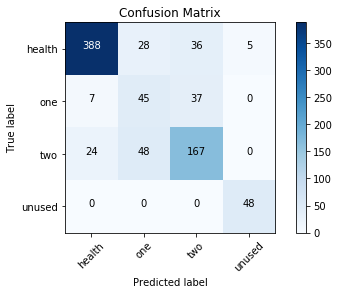

In [22]:
predictions = model_one_fine.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [24]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_one_fine.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))

0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       457
           1       0.37      0.51      0.43        89
           2       0.70      0.70      0.70       239
           3       0.91      1.00      0.95        48

    accuracy                           0.78       833
   macro avg       0.72      0.76      0.74       833
weighted avg       0.80      0.78      0.79       833

